In [90]:
import csv
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import math
import os
from sklearn.impute import KNNImputer
import seaborn as sns


In [91]:
# load data

data_df_1 = pd.read_csv("loans.csv")
data_df_2 = pd.read_csv("loan_test.csv")
data_df_2['Status'] = ''

data_df = pd.concat([data_df_1, data_df_2], ignore_index=True)

In [92]:
# map non-numeric columns to numeric values
def gender_numerizer(v):
    if v == 'Male':
        return 0
    elif v == 'Female':
        return 1
    else:
        return pd.NA

data_df['Gender'] = [gender_numerizer(v) for v in data_df['Gender']]
data_df['Gender'] = pd.to_numeric(data_df['Gender'], downcast="integer")

def married_numerizer(v):
    if v == 'No':
        return 0
    elif v == 'Yes':
        return 1
    else:
        return pd.NA

data_df['Married'] = [married_numerizer(v) for v in data_df['Married']]
data_df['Married'] = pd.to_numeric(data_df['Married'], downcast="integer")

def dependants_numerizer(v):
    if v == '0':
        return 0
    elif v == '1':
        return 1
    elif v == '2':
        return 2
    elif v == '3+':
        return 3
    else:
        return pd.NA

data_df['Dependents'] = [dependants_numerizer(v) for v in data_df['Dependents']]
data_df['Dependents'] = pd.to_numeric(data_df['Dependents'], downcast="integer")

def education_numerizer(v):
    if v == 'Not Graduate':
        return 0
    elif v == 'Graduate':
        return 1
    else:
        return pd.NA

data_df['Education'] = [education_numerizer(v) for v in data_df['Education']]
data_df['Education'] = pd.to_numeric(data_df['Education'], downcast="integer")

def employement_numerizer(v):
    if v == 'No':
        return 0
    elif v == 'Yes':
        return 1
    else:
        return pd.NA

data_df['Self_Employed'] = [employement_numerizer(v) for v in data_df['Self_Employed']]
data_df['Self_Employed'] = pd.to_numeric(data_df['Self_Employed'], downcast="integer")


def area_numerizer(v):
    if v == 'Urban':
        return 0
    elif v == 'Semiurban':
        return 1
    elif v == 'Rural':
        return 2
    else:
        return pd.NA

data_df['Area'] = [area_numerizer(v) for v in data_df['Area']]
data_df['Area'] = pd.to_numeric(data_df['Area'], downcast="integer")


def status_numerizer(v):
    if v == 'N':
        return 0
    elif v == 'Y':
        return 1
    else:
        return pd.NA

data_df['Status'] = [status_numerizer(v) for v in data_df['Status']]
data_df['Status'] = pd.to_numeric(data_df['Status'], downcast="integer")


In [93]:
# exploratory analysis
data_df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0.0,0.0,0.0,1,0.0,584900,0.0,15000000,360.0,1.0,0,1.0
1,0.0,1.0,1.0,1,0.0,458300,150800.0,12800000,360.0,1.0,2,0.0
2,0.0,1.0,0.0,1,1.0,300000,0.0,6600000,360.0,1.0,0,1.0
3,0.0,1.0,0.0,0,0.0,258300,235800.0,12000000,360.0,1.0,0,1.0
4,0.0,0.0,0.0,1,0.0,600000,0.0,14100000,360.0,1.0,0,1.0
5,0.0,1.0,2.0,1,1.0,541700,419600.0,26700000,360.0,1.0,0,1.0
6,0.0,1.0,0.0,0,0.0,233300,151600.0,9500000,360.0,1.0,0,1.0
7,0.0,1.0,3.0,1,0.0,303600,250400.0,15800000,360.0,0.0,1,0.0
8,0.0,1.0,2.0,1,0.0,400600,152600.0,16800000,360.0,1.0,0,1.0
9,0.0,1.0,1.0,1,0.0,1284100,1096800.0,34900000,360.0,1.0,1,0.0


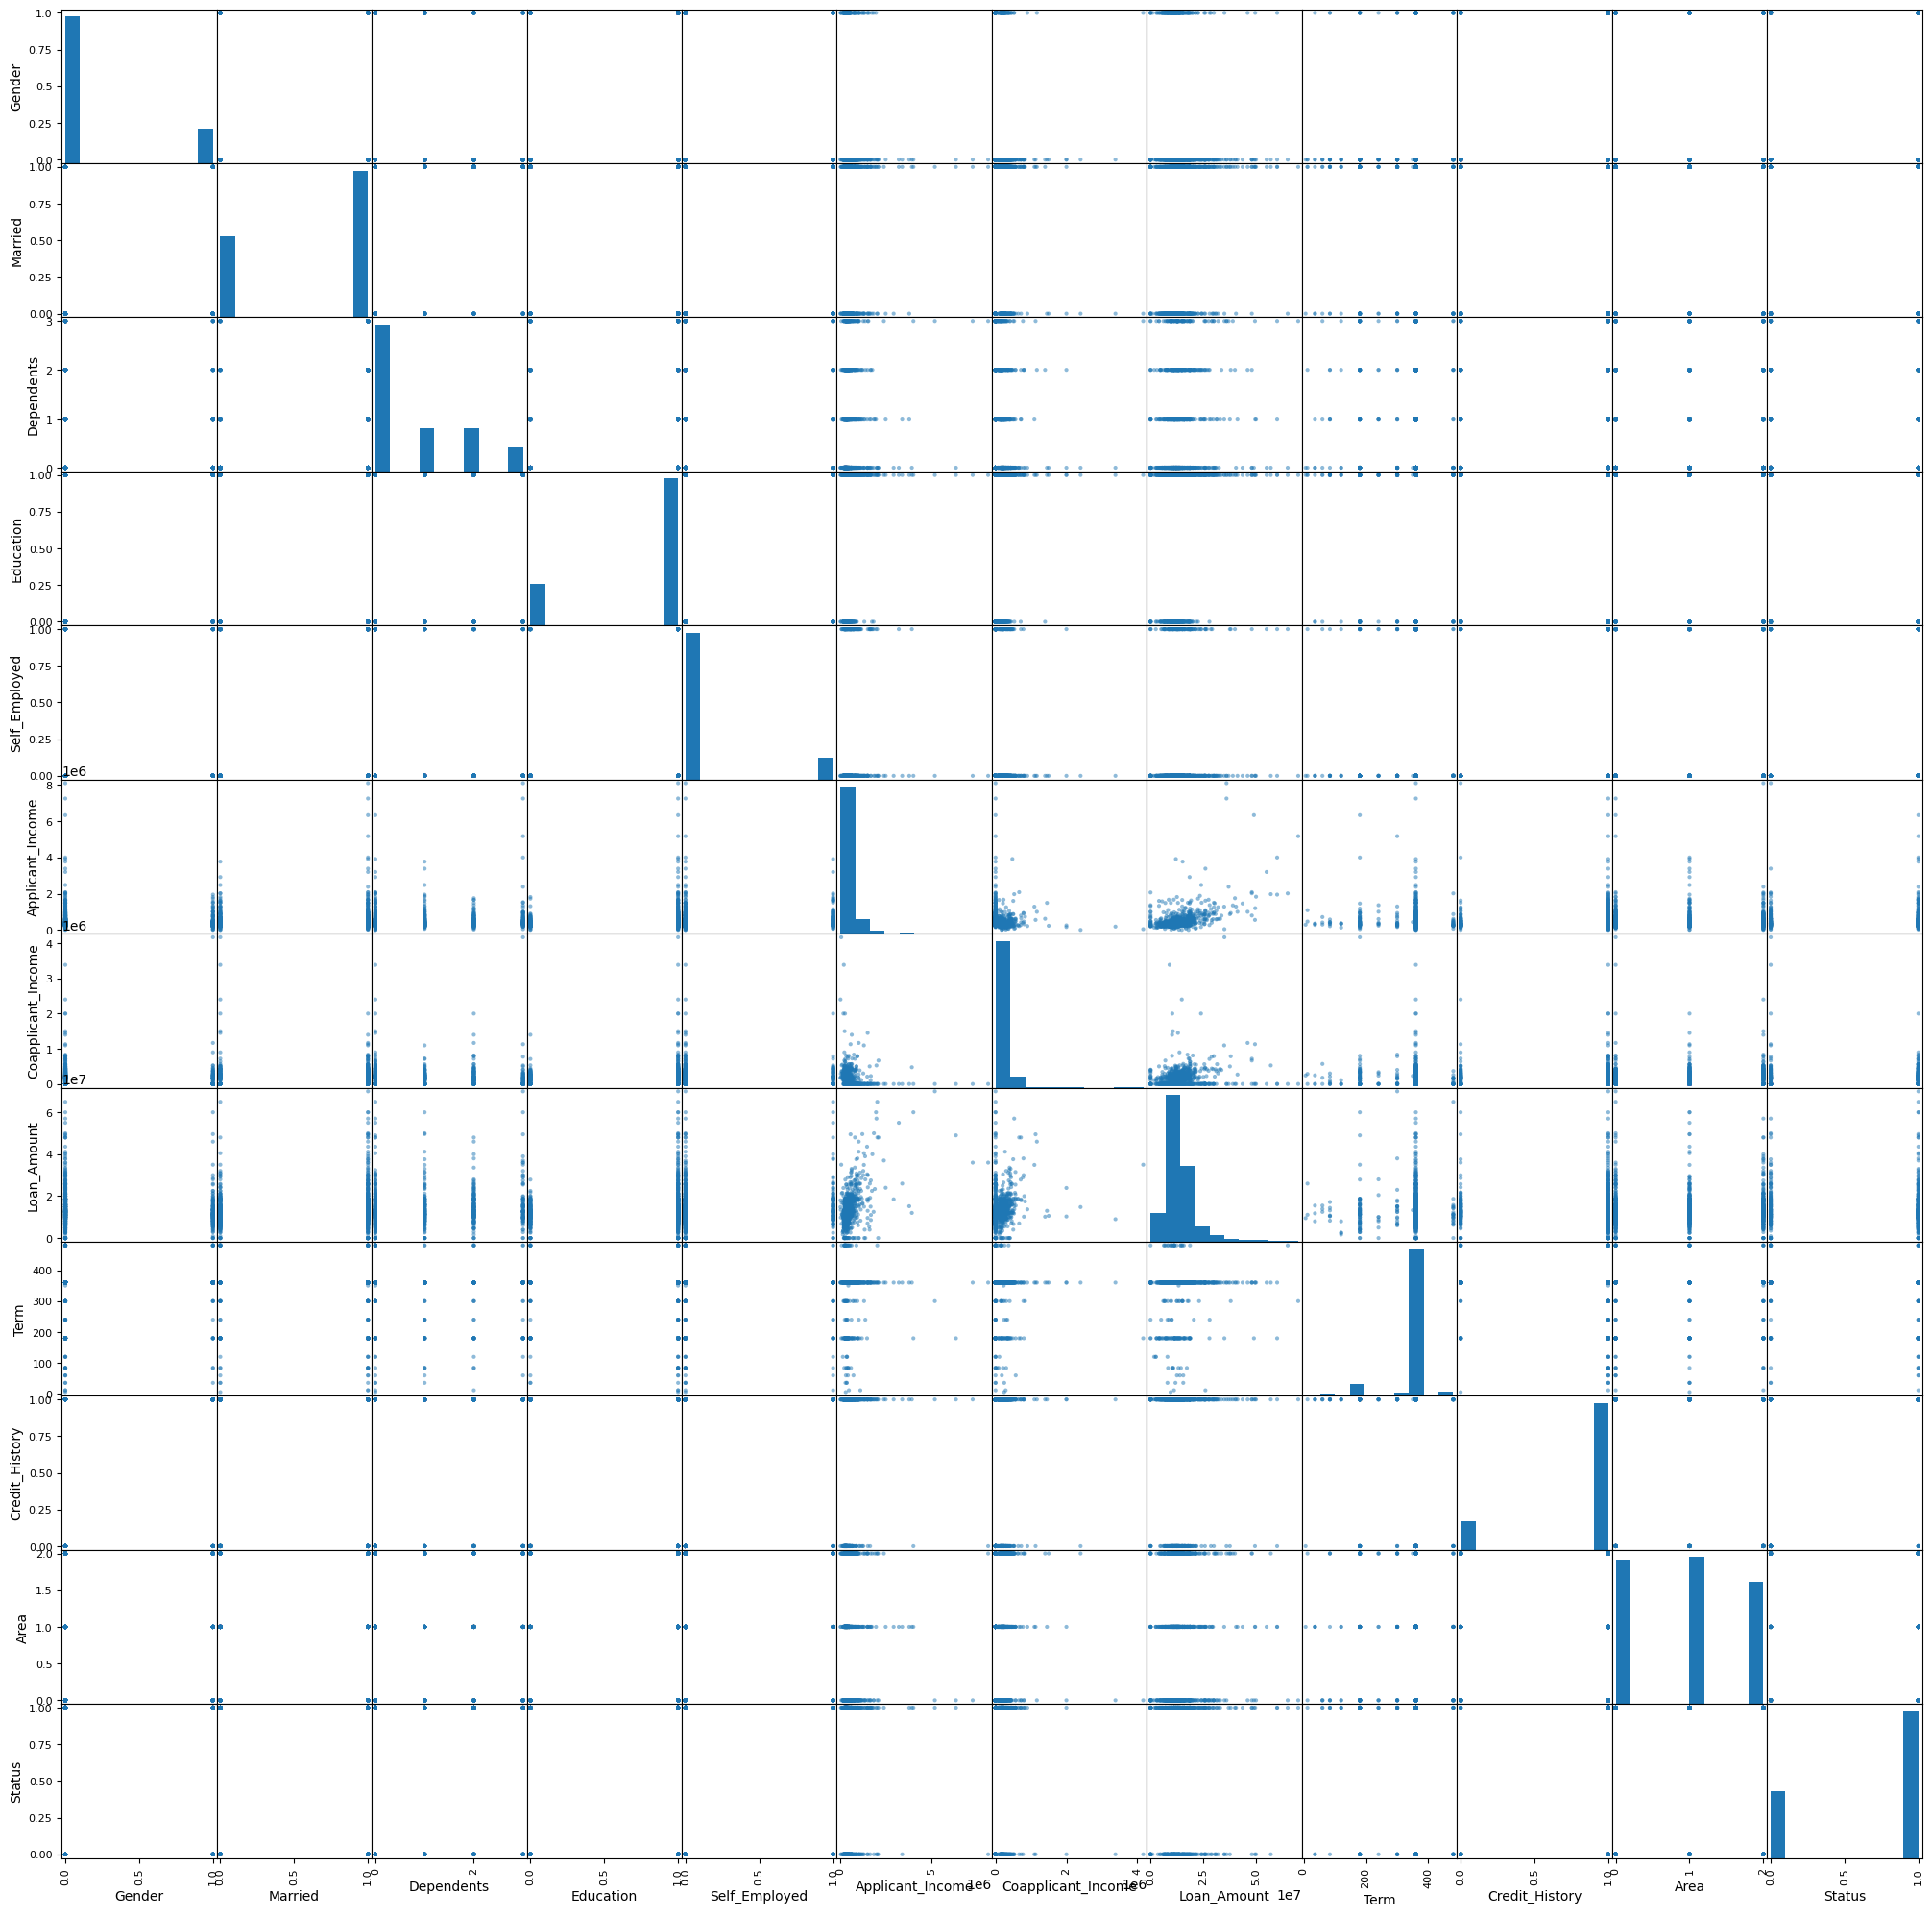

In [94]:
# plot scatter matrix
pd.plotting.scatter_matrix(data_df, figsize=(25,25))
plt.show()

In [95]:
# print correlation matrix
corr = data_df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
Gender,1.000000,-0.337228,-0.143635,0.041657,-0.020697,-0.057489,-0.083596,-0.087396,0.071036,-0.024921,-0.019648,-0.019857
Married,-0.337228,1.000000,0.351099,-0.027459,0.013733,0.051781,0.062812,0.139079,-0.049497,0.021840,-0.005586,0.089280
Dependents,-0.143635,0.351099,1.000000,-0.085486,0.029905,0.123649,-0.000936,0.141030,-0.085073,-0.050851,-0.025591,0.006781
Education,0.041657,-0.027459,-0.085486,1.000000,0.011429,0.138909,0.060380,0.165171,0.024396,0.066182,-0.050685,0.085884
Self_Employed,-0.020697,0.013733,0.029905,0.011429,1.000000,0.123286,-0.016308,0.109549,-0.034812,0.035852,0.062292,-0.002303
Applicant_Income,-0.057489,0.051781,0.123649,0.138909,0.123286,1.000000,-0.114247,0.519334,-0.023089,0.023378,-0.005513,-0.004710
Coapplicant_Income,-0.083596,0.062812,-0.000936,0.060380,-0.016308,-0.114247,1.000000,0.177973,-0.043860,-0.027253,0.024921,-0.059187
Loan_Amount,-0.087396,0.139079,0.141030,0.165171,0.109549,0.519334,0.177973,1.000000,0.049772,-0.002747,0.042282,-0.008782
Term,0.071036,-0.049497,-0.085073,0.024396,-0.034812,-0.023089,-0.043860,0.049772,1.000000,-0.020439,0.042744,-0.021268
Credit_History,-0.024921,0.021840,-0.050851,0.066182,0.035852,0.023378,-0.027253,-0.002747,-0.020439,1.000000,-0.023261,0.561678


In [96]:
# show places where corr matrix is bigger than 0.3
corr[abs(corr)>0.3]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
Gender,1.000000,-0.337228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,-0.337228,1.000000,0.351099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,0.351099,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applicant_Income,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.519334,NaN,NaN,NaN,NaN
Coapplicant_Income,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Loan_Amount,NaN,NaN,NaN,NaN,NaN,0.519334,NaN,1.000000,NaN,NaN,NaN,NaN
Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.561678


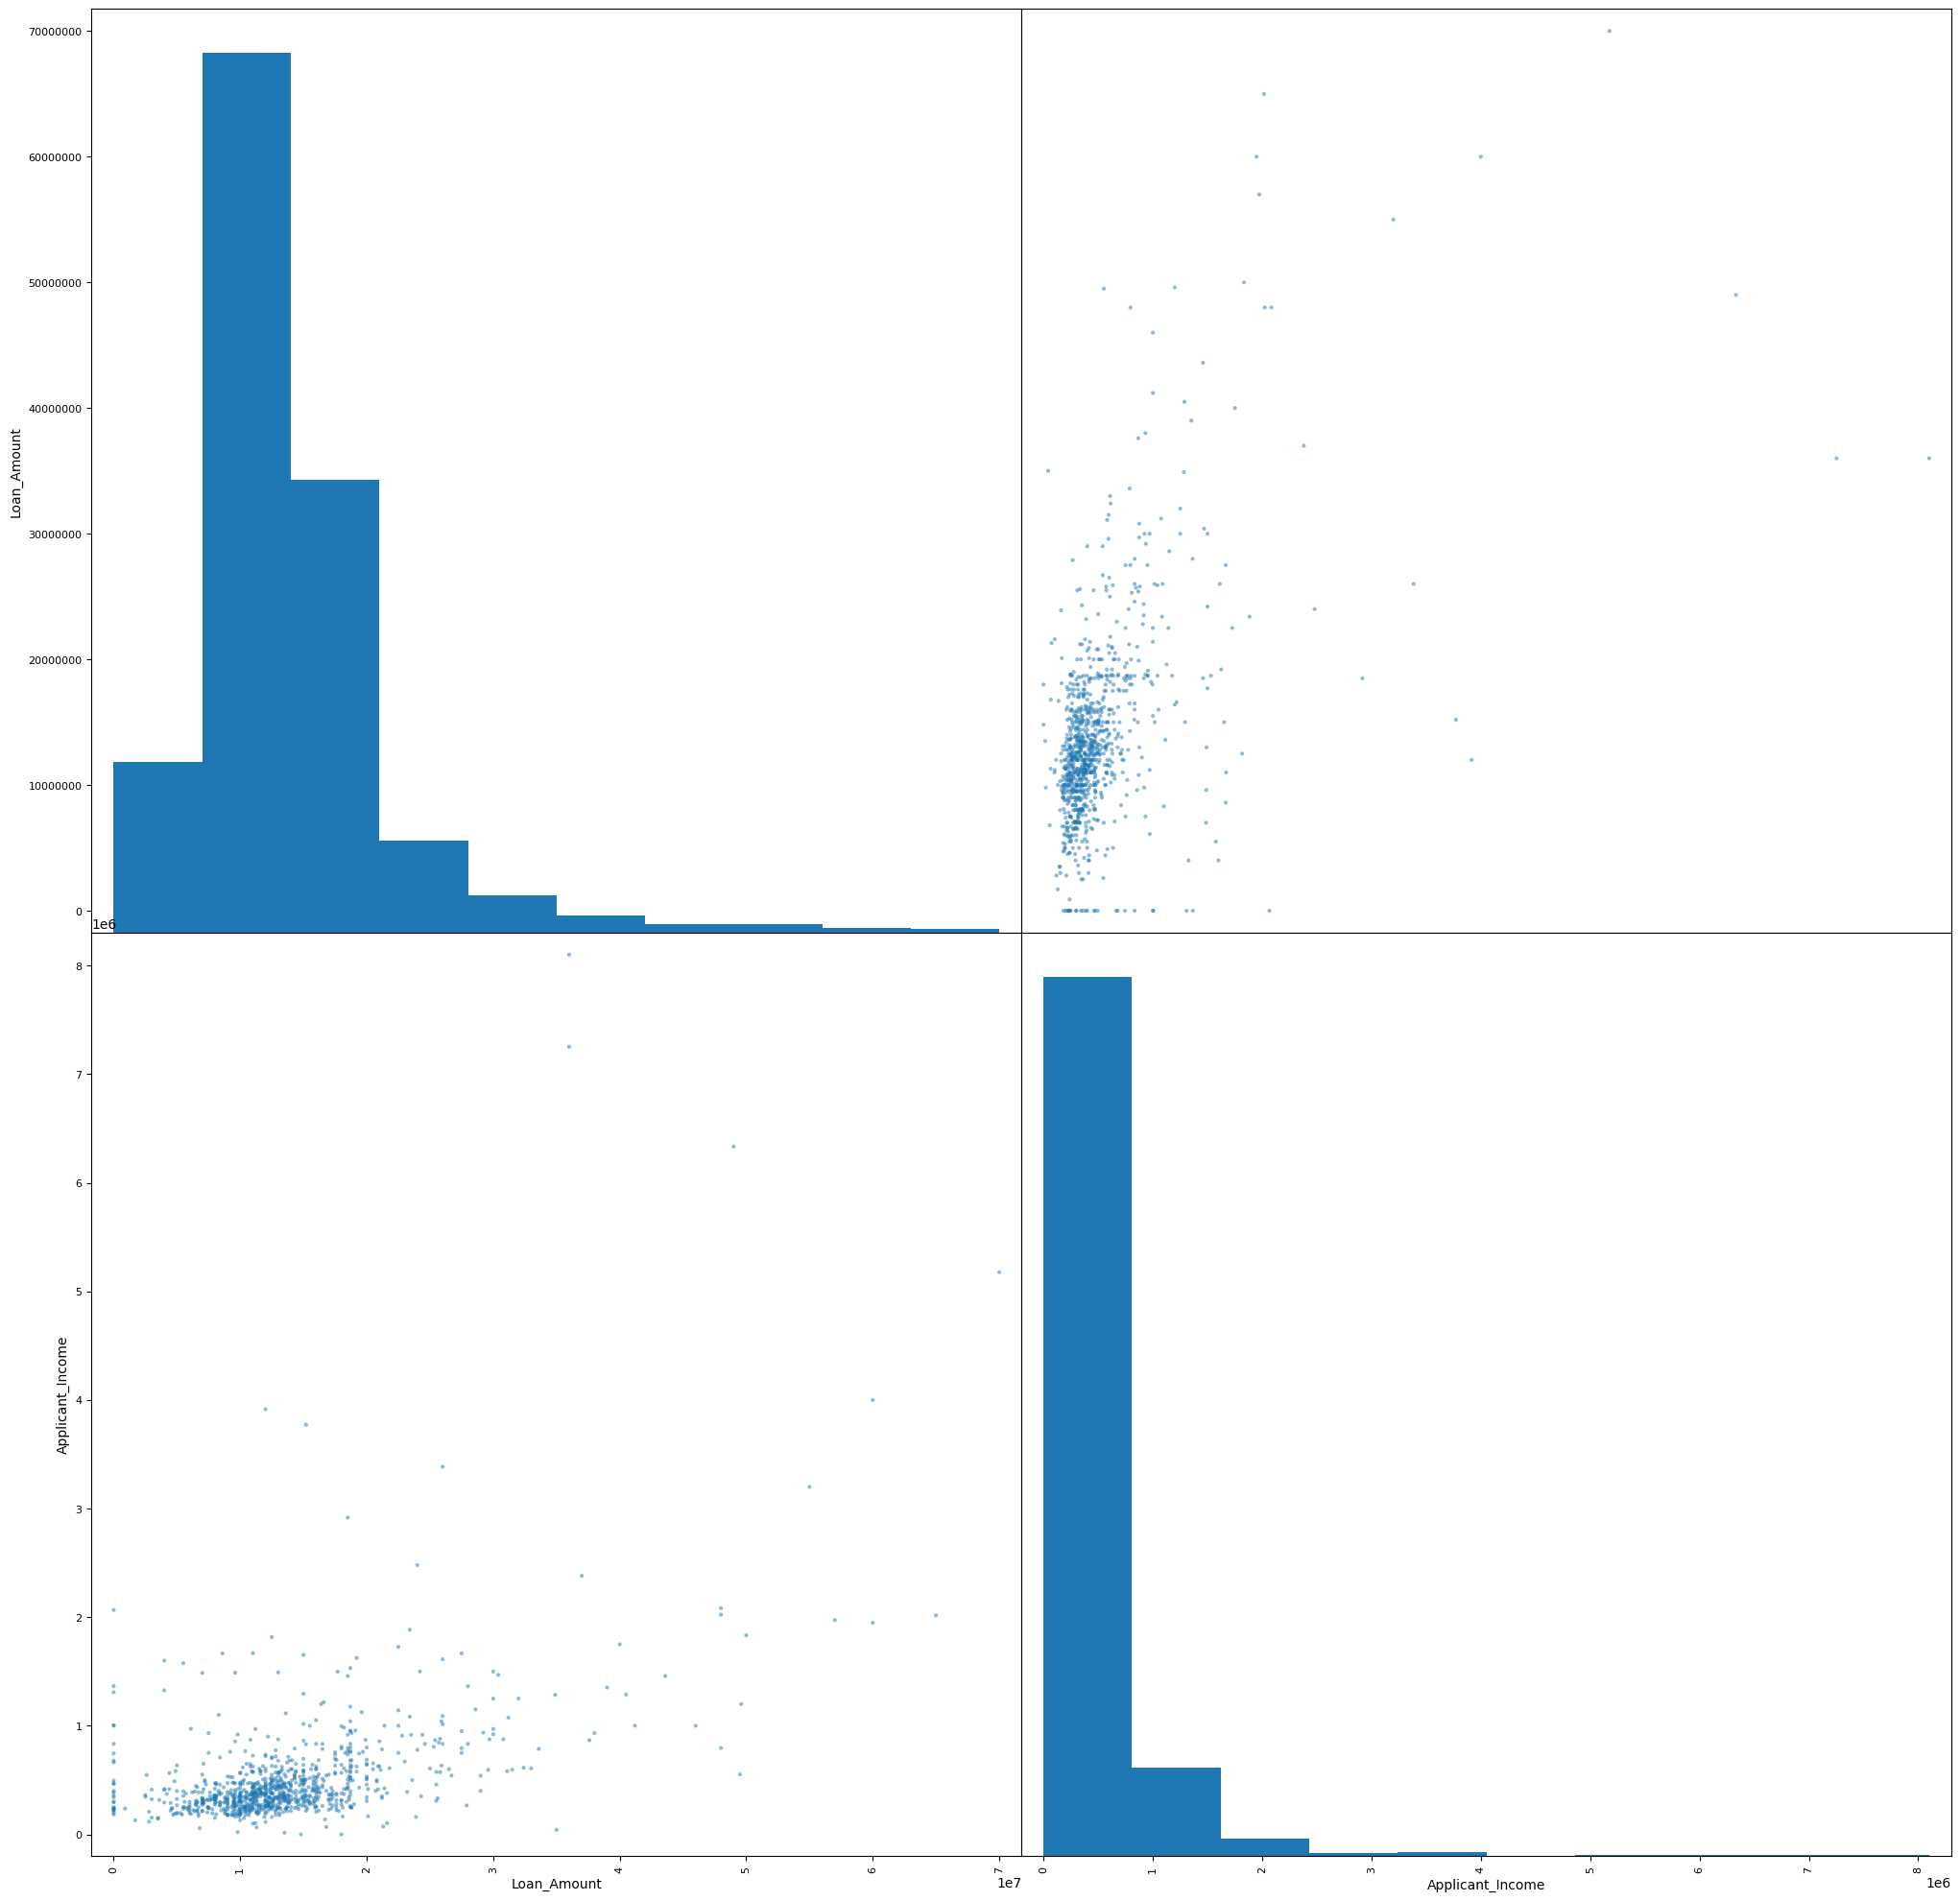

In [97]:
# plot the numeric outliers in correlation (Loan_Amount - Applicant_Income)
pd.plotting.scatter_matrix(data_df[["Loan_Amount","Applicant_Income"]], figsize=(25,25))
plt.show()

In [98]:
# remove the high correlation features, that have the lowest correlation to Status
data_df = data_df.loc[:, data_df.columns != "Gender"]
data_df = data_df.loc[:, data_df.columns != "Dependents"]
data_df = data_df.loc[:, data_df.columns != "Applicant_Income"]

In [99]:
# replace Coapplicant_Income with binary column "Coapplicant"
CoappBool = pd.to_numeric(data_df["Coapplicant_Income"] > 0.0)
CoappNum = np.zeros(len(CoappBool))
CoappNum[CoappBool==1] = 1
data_df["Coapplicant"] = CoappNum

data_df = data_df[["Married", "Education", "Self_Employed","Loan_Amount" , "Coapplicant", "Term",
                   "Credit_History", "Area","Status"]]

In [100]:
# exploratory analysis
data_df.head(20)

,Married,Education,Self_Employed,Loan_Amount,Coapplicant,Term,Credit_History,Area,Status
0,0.0,1,0.0,15000000,0.0,360.0,1.0,0,1.0
1,1.0,1,0.0,12800000,1.0,360.0,1.0,2,0.0
2,1.0,1,1.0,6600000,0.0,360.0,1.0,0,1.0
3,1.0,0,0.0,12000000,1.0,360.0,1.0,0,1.0
4,0.0,1,0.0,14100000,0.0,360.0,1.0,0,1.0
5,1.0,1,1.0,26700000,1.0,360.0,1.0,0,1.0
6,1.0,0,0.0,9500000,1.0,360.0,1.0,0,1.0
7,1.0,1,0.0,15800000,1.0,360.0,0.0,1,0.0
8,1.0,1,0.0,16800000,1.0,360.0,1.0,0,1.0
9,1.0,1,0.0,34900000,1.0,360.0,1.0,1,0.0


In [101]:
# use KNN imputation
imputer = KNNImputer(n_neighbors = 5)  # KNN, K = 5
# impute the data, not including the Status column
df = pd.DataFrame(imputer.fit_transform(data_df[["Married","Education","Self_Employed","Loan_Amount",
                               "Coapplicant","Term","Credit_History","Area"]]))

df.columns = ["Married","Education","Self_Employed","Loan_Amount",
                               "Coapplicant","Term","Credit_History","Area"]
# return the status column to the data frame
df["Status"] = data_df["Status"].values.tolist()
data_df = df
data_df.head(20)

,Married,Education,Self_Employed,Loan_Amount,Coapplicant,Term,Credit_History,Area,Status
0,0.0,1.0,0.0,15000000.0,0.0,360.0,1.0,0.0,1.0
1,1.0,1.0,0.0,12800000.0,1.0,360.0,1.0,2.0,0.0
2,1.0,1.0,1.0,6600000.0,0.0,360.0,1.0,0.0,1.0
3,1.0,0.0,0.0,12000000.0,1.0,360.0,1.0,0.0,1.0
4,0.0,1.0,0.0,14100000.0,0.0,360.0,1.0,0.0,1.0
5,1.0,1.0,1.0,26700000.0,1.0,360.0,1.0,0.0,1.0
6,1.0,0.0,0.0,9500000.0,1.0,360.0,1.0,0.0,1.0
7,1.0,1.0,0.0,15800000.0,1.0,360.0,0.0,1.0,0.0
8,1.0,1.0,0.0,16800000.0,1.0,360.0,1.0,0.0,1.0
9,1.0,1.0,0.0,34900000.0,1.0,360.0,1.0,1.0,0.0


In [102]:
# round categorical features after imputation to whole numbers
data_df.Married = data_df.Married.round()
data_df.Education = data_df.Education.round()
data_df.Self_Employed = data_df.Self_Employed.round()
data_df.Coapplicant = data_df.Coapplicant.round()
data_df.Credit_History = data_df.Credit_History.round()
data_df.Area = data_df.Area.round()
data_df.head(20)

,Married,Education,Self_Employed,Loan_Amount,Coapplicant,Term,Credit_History,Area,Status
0,0.0,1.0,0.0,15000000.0,0.0,360.0,1.0,0.0,1.0
1,1.0,1.0,0.0,12800000.0,1.0,360.0,1.0,2.0,0.0
2,1.0,1.0,1.0,6600000.0,0.0,360.0,1.0,0.0,1.0
3,1.0,0.0,0.0,12000000.0,1.0,360.0,1.0,0.0,1.0
4,0.0,1.0,0.0,14100000.0,0.0,360.0,1.0,0.0,1.0
5,1.0,1.0,1.0,26700000.0,1.0,360.0,1.0,0.0,1.0
6,1.0,0.0,0.0,9500000.0,1.0,360.0,1.0,0.0,1.0
7,1.0,1.0,0.0,15800000.0,1.0,360.0,0.0,1.0,0.0
8,1.0,1.0,0.0,16800000.0,1.0,360.0,1.0,0.0,1.0
9,1.0,1.0,0.0,34900000.0,1.0,360.0,1.0,1.0,0.0


<AxesSubplot:title={'center':'Loan_Amount'}, xlabel='[Married, Education, Self_Employed, Coapplicant, Area]'>

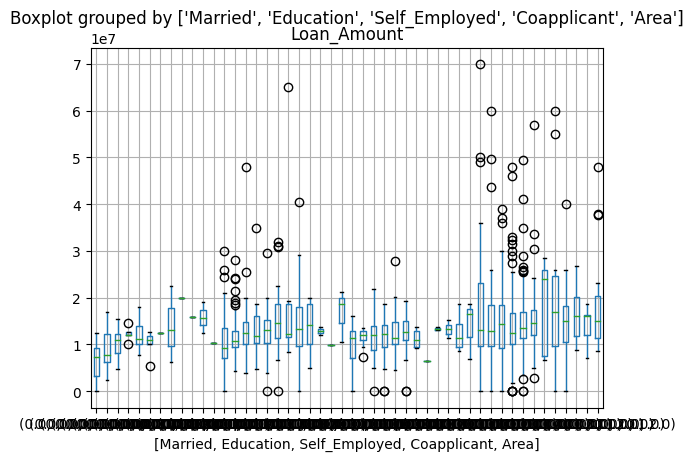

In [103]:
# outlier detection
boxplot = data_df.boxplot(column="Loan_Amount", by=['Married', 'Education', 'Self_Employed', 'Coapplicant', 'Area'])
boxplot

In [104]:
# filter out outliers

# calculate quantiles grouped by the different categorical data of the population
res = data_df.groupby(['Married','Education','Self_Employed','Coapplicant',
                       'Area'])["Loan_Amount"].quantile([0.05, 0.95])


In [105]:
# filter list of which rows are outliers (1 - not an outlier, 0 - outlier)
deletelist = np.ones(len(data_df["Loan_Amount"]))

# iterate through the data, and set data which is an outlier in the corresponding group to 0 in the filter
for ind in data_df.index:
    m_ind = data_df['Married'][ind]
    e_ind = data_df['Education'][ind]
    se_ind = data_df['Self_Employed'][ind]
    c_ind = data_df['Coapplicant'][ind]
    a_ind = data_df['Area'][ind]
    
    l_ind = data_df['Loan_Amount'][ind]
    
    if((not np.isnan(m_ind)) and
       (not np.isnan(e_ind)) and
       (not np.isnan(se_ind)) and
       (not np.isnan(c_ind)) and
       (not np.isnan(a_ind))):
        if((res[m_ind, e_ind, se_ind, c_ind, a_ind, 0.05] > l_ind) or
           (res[m_ind, e_ind, se_ind, c_ind, a_ind, 0.95] < l_ind)):
            deletelist[ind] = 0

print(len(deletelist) - np.count_nonzero(deletelist))  # print number of outliers found
deletelist = [bool(x) for x in deletelist]  # turn into boolean
data_df = data_df.loc[deletelist]  # delete the outliers from the data

138


In [106]:
# data size left
print(len(data_df['Status']))

843


<AxesSubplot:>

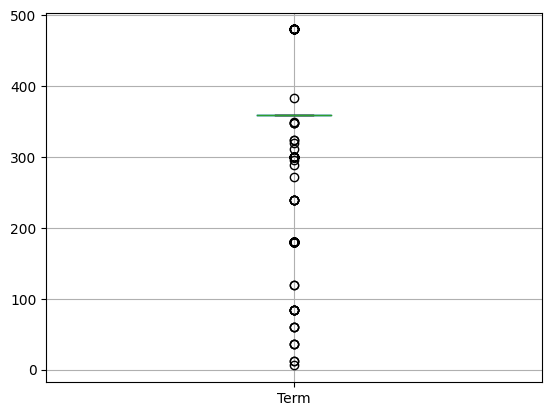

In [107]:
boxplot = data_df.boxplot(column="Term")
boxplot

In [108]:
# filter out outliers
# remove all points that are less than 10 years or more than 40 years
filter = (data_df["Term"] >= 10*12) & (data_df["Term"] <= 40*12)  

print(len(filter) - np.count_nonzero(filter))  # number of outliers
data_df = data_df.loc[filter] # remove outliers

16


In [109]:
# Standardization - Loan Amount
mean = np.mean(data_df["Loan_Amount"])
print(mean)
variance = np.var(data_df["Loan_Amount"])
print(variance)

data_df["Loan_Amount"] = (data_df["Loan_Amount"] - mean)/np.sqrt(variance)


# Normalization - Term
maxNum = np.max(data_df["Term"])
print(maxNum)
minNum = np.min(data_df["Term"])
print(minNum)

data_df["Term"] = (data_df["Term"] - minNum)/(maxNum - minNum)

13320435.30834341
26433258335295.04
480.0
120.0


In [110]:
data_df.head(20)

,Married,Education,Self_Employed,Loan_Amount,Coapplicant,Term,Credit_History,Area,Status
0,0.0,1.0,0.0,0.326679,0.0,0.666667,1.0,0.0,1.0
1,1.0,1.0,0.0,-0.101226,1.0,0.666667,1.0,2.0,0.0
3,1.0,0.0,0.0,-0.256828,1.0,0.666667,1.0,0.0,1.0
4,0.0,1.0,0.0,0.151627,0.0,0.666667,1.0,0.0,1.0
6,1.0,0.0,0.0,-0.743083,1.0,0.666667,1.0,0.0,1.0
7,1.0,1.0,0.0,0.482281,1.0,0.666667,0.0,1.0,0.0
8,1.0,1.0,0.0,0.676783,1.0,0.666667,1.0,0.0,1.0
10,1.0,1.0,0.0,-1.229339,1.0,0.666667,1.0,0.0,1.0
11,1.0,1.0,0.0,-0.470780,1.0,0.666667,1.0,0.0,1.0
12,1.0,1.0,0.0,1.299190,1.0,0.666667,1.0,0.0,1.0


(array([ 21., 265., 377., 121.,  26.,  12.,   4.,   0.,   0.,   1.]),
 array([-2.59085476, -1.52109233, -0.45132991,  0.61843252,  1.68819494,
         2.75795736,  3.82771979,  4.89748221,  5.96724464,  7.03700706,
         8.10676949]),
 <BarContainer object of 10 artists>)

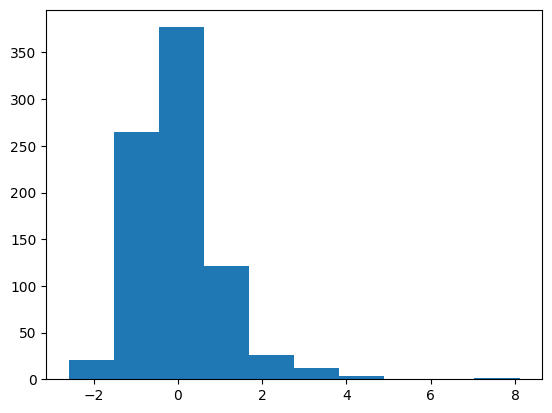

In [111]:
plt.hist(data_df["Loan_Amount"])

(array([  2.,  56.,   0.,   6.,   3.,  22., 718.,   1.,   0.,  19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

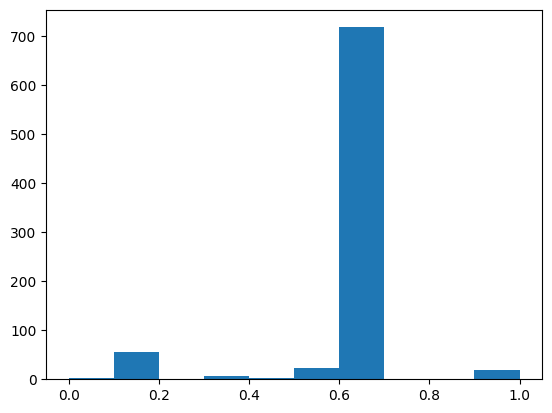

In [112]:
plt.hist(data_df["Term"])

In [113]:
# save the database to a file
# data_df.to_csv((os.getcwd()+'\out.csv'))

In [114]:
# research likelihood

# print correlation matrix
corr = data_df.corr()
corr

,Married,Education,Self_Employed,Loan_Amount,Coapplicant,Term,Credit_History,Area,Status
Married,1.000000,-0.024503,0.004724,0.212418,0.334094,-0.064253,0.032356,-0.012616,0.079774
Education,-0.024503,1.000000,0.072824,0.189026,-0.050085,0.038015,0.063309,-0.048498,0.082206
Self_Employed,0.004724,0.072824,1.000000,0.142848,-0.058782,-0.040381,0.013077,0.067112,-0.004148
Loan_Amount,0.212418,0.189026,0.142848,1.000000,0.109534,0.081541,-0.003446,0.084792,-0.018197
Coapplicant,0.334094,-0.050085,-0.058782,0.109534,1.000000,0.021789,-0.040197,0.015946,0.093714
Term,-0.064253,0.038015,-0.040381,0.081541,0.021789,1.000000,0.034978,0.026577,-0.023267
Credit_History,0.032356,0.063309,0.013077,-0.003446,-0.040197,0.034978,1.000000,-0.028466,0.578568
Area,-0.012616,-0.048498,0.067112,0.084792,0.015946,0.026577,-0.028466,1.000000,-0.030369
Status,0.079774,0.082206,-0.004148,-0.018197,0.093714,-0.023267,0.578568,-0.030369,1.000000


In [151]:
# avg correlation for status
statusCorr = abs(corr["Status"][["Married","Education","Self_Employed","Loan_Amount","Coapplicant","Term","Credit_History","Area"]])

# avg correlation for other features
marriedCorr = abs(corr["Married"][["Education","Self_Employed","Loan_Amount","Coapplicant","Term","Credit_History","Area"]])
educationCorr = abs(corr["Education"][["Married","Self_Employed","Loan_Amount","Coapplicant","Term","Credit_History","Area"]])
employementCorr = abs(corr["Self_Employed"][["Married","Education","Loan_Amount","Coapplicant","Term","Credit_History","Area"]])
loanCorr = abs(corr["Loan_Amount"][["Married","Education","Self_Employed","Coapplicant","Term","Credit_History","Area"]])
coapplicantCorr = abs(corr["Coapplicant"][["Married","Education","Self_Employed","Loan_Amount","Term","Credit_History","Area"]])
termCorr = abs(corr["Term"][["Married","Education","Self_Employed","Loan_Amount","Coapplicant","Credit_History","Area"]])
creditCorr = abs(corr["Credit_History"][["Married","Education","Self_Employed","Loan_Amount","Coapplicant","Term","Area"]])
areaCorr = abs(corr["Area"][["Married","Education","Self_Employed","Loan_Amount","Coapplicant","Term","Credit_History"]])

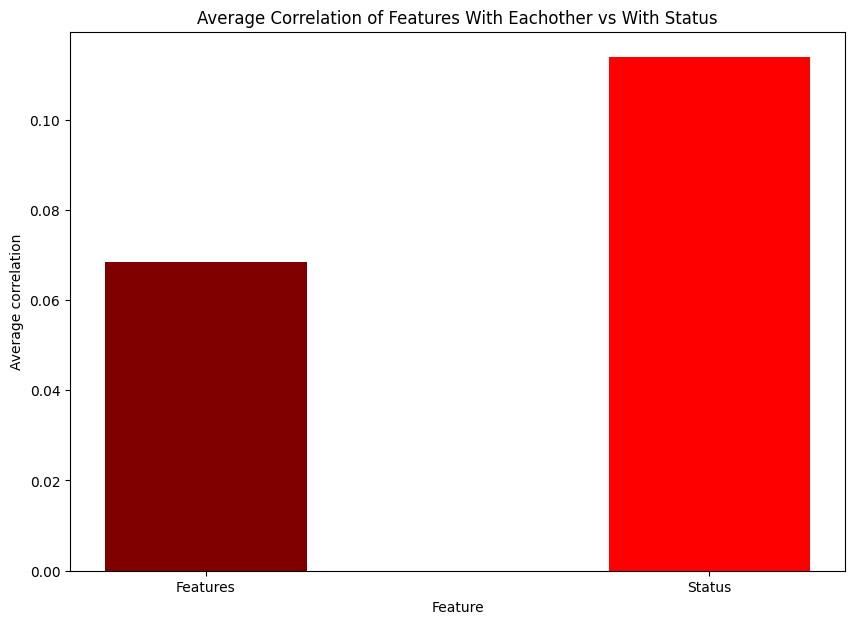

In [153]:
# plot using a barchart
names = ["Features","Status"]
values = [np.mean([marriedCorr,educationCorr,employementCorr,loanCorr,coapplicantCorr,termCorr,creditCorr,areaCorr]),np.mean(statusCorr)]
colors = ["maroon","red"]

fig = plt.figure(figsize =(10, 7))

plt.bar(names, values, color = colors, width = 0.4)

plt.ylabel("Average correlation")
plt.xlabel("Feature")
plt.title("Average Correlation of Features With Eachother vs With Status")

#plt.yticks([])
plt.show()

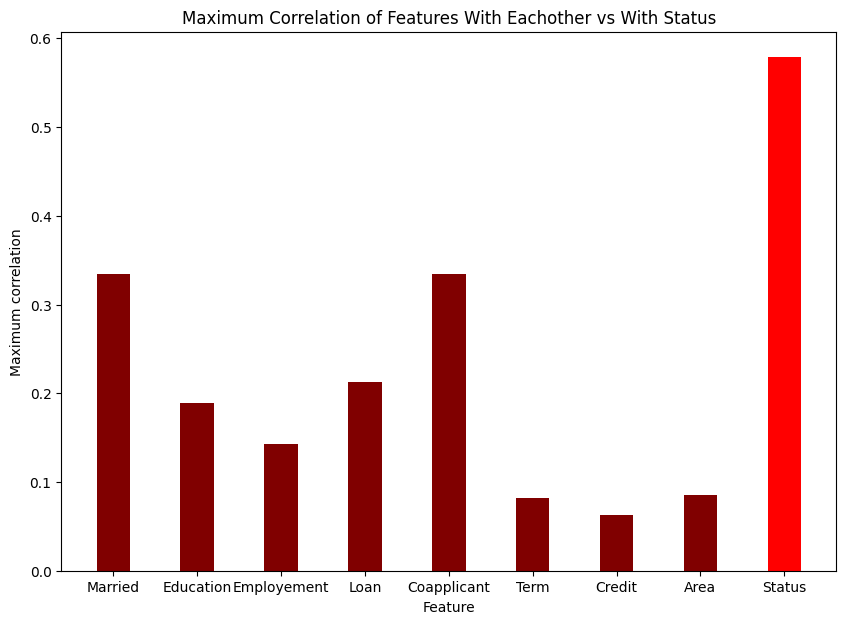

In [159]:
# plot using a barchart
names = ["Married","Education","Employement","Loan","Coapplicant","Term","Credit","Area","Status"]
values = [np.max(marriedCorr),
         np.max(educationCorr),
         np.max(employementCorr),
         np.max(loanCorr),
         np.max(coapplicantCorr),
         np.max(termCorr),
         np.max(creditCorr),
         np.max(areaCorr),
         np.max(statusCorr)]
colors = ["maroon"] * 8 + ["red"]

fig = plt.figure(figsize =(10, 7))

plt.bar(names, values, color = colors, width = 0.4)

plt.ylabel("Maximum correlation")
plt.xlabel("Feature")
plt.title("Maximum Correlation of Features With Eachother vs With Status")

#plt.yticks([])
plt.show()